In [12]:
from pitchr import model_maker
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
DATA_PATH = "../dataset/_xml_scores"
score_files = os.listdir(DATA_PATH)

In [2]:
# Load data
all_melody_np, all_harmony_np = model_maker.load_data()

In [3]:
# Prepare data for training
x_train, x_test, y_train, y_test = train_test_split(all_melody_np, all_harmony_np, test_size=0.2)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)
normalized_x_train = x_train / 50
normalized_y_train = y_train / 50
normalized_x_test = x_test / 50
normalized_y_test = y_test / 50

In [4]:
# Build model
model = model_maker.build_model()

In [5]:
# Compile model
optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, metrics=['accuracy'], loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 200)           162400    
_________________________________________________________________
dropout (Dropout)            (None, 50, 200)           0         
_________________________________________________________________
dense (Dense)                (None, 50, 150)           30150     
_________________________________________________________________
dense_1 (Dense)              (None, 50, 50)            7550      
_________________________________________________________________
dense_2 (Dense)              (None, 50, 2)             102       
Total params: 200,202
Trainable params: 200,202
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Train model
trained_model = model.fit(normalized_x_train, normalized_y_train, epochs=500,
                          validation_data=(normalized_x_test, normalized_y_test), batch_size=5)

Epoch 1/500
34/34 [==============================] - 1s 33ms/step - loss: 0.1210 - accuracy: 0.6411 - val_loss: 0.1162 - val_accuracy: 0.6957
Epoch 2/500
34/34 [==============================] - 1s 33ms/step - loss: 0.1174 - accuracy: 0.6479 - val_loss: 0.1231 - val_accuracy: 0.6957
Epoch 3/500
34/34 [==============================] - 1s 33ms/step - loss: 0.1170 - accuracy: 0.6448 - val_loss: 0.1154 - val_accuracy: 0.6957
Epoch 4/500
34/34 [==============================] - 1s 35ms/step - loss: 0.1200 - accuracy: 0.6457 - val_loss: 0.1395 - val_accuracy: 0.6981
Epoch 5/500
34/34 [==============================] - 1s 34ms/step - loss: 0.1202 - accuracy: 0.6435 - val_loss: 0.1285 - val_accuracy: 0.6971
Epoch 6/500
34/34 [==============================] - 1s 36ms/step - loss: 0.1238 - accuracy: 0.6392 - val_loss: 0.1104 - val_accuracy: 0.6943
Epoch 7/500
34/34 [==============================] - 1s 42ms/step - loss: 0.1165 - accuracy: 0.6443 - val_loss: 0.1092 - val_accuracy: 0.6957
Epoch 

34/34 [==============================] - 1s 40ms/step - loss: 0.0987 - accuracy: 0.6718 - val_loss: 0.0955 - val_accuracy: 0.7048
Epoch 59/500
34/34 [==============================] - 1s 40ms/step - loss: 0.0951 - accuracy: 0.6757 - val_loss: 0.0949 - val_accuracy: 0.6967
Epoch 60/500
34/34 [==============================] - 1s 40ms/step - loss: 0.0963 - accuracy: 0.6592 - val_loss: 0.0952 - val_accuracy: 0.7067
Epoch 61/500
34/34 [==============================] - 1s 40ms/step - loss: 0.0979 - accuracy: 0.6746 - val_loss: 0.0992 - val_accuracy: 0.6986
Epoch 62/500
34/34 [==============================] - 1s 40ms/step - loss: 0.1070 - accuracy: 0.6533 - val_loss: 0.0997 - val_accuracy: 0.6957
Epoch 63/500
34/34 [==============================] - 1s 41ms/step - loss: 0.0991 - accuracy: 0.6661 - val_loss: 0.0968 - val_accuracy: 0.7110
Epoch 64/500
34/34 [==============================] - 1s 40ms/step - loss: 0.0975 - accuracy: 0.6669 - val_loss: 0.0984 - val_accuracy: 0.6948
Epoch 65/500

34/34 [==============================] - 1s 42ms/step - loss: 0.0662 - accuracy: 0.7075 - val_loss: 0.0967 - val_accuracy: 0.7000
Epoch 116/500
34/34 [==============================] - 1s 42ms/step - loss: 0.0615 - accuracy: 0.7198 - val_loss: 0.1186 - val_accuracy: 0.6948
Epoch 117/500
34/34 [==============================] - 1s 43ms/step - loss: 0.0692 - accuracy: 0.7140 - val_loss: 0.1115 - val_accuracy: 0.6938
Epoch 118/500
34/34 [==============================] - 1s 42ms/step - loss: 0.0660 - accuracy: 0.7225 - val_loss: 0.0981 - val_accuracy: 0.6986
Epoch 119/500
34/34 [==============================] - 1s 41ms/step - loss: 0.0633 - accuracy: 0.7065 - val_loss: 0.1109 - val_accuracy: 0.6795
Epoch 120/500
34/34 [==============================] - 1s 43ms/step - loss: 0.0627 - accuracy: 0.7200 - val_loss: 0.1124 - val_accuracy: 0.6757
Epoch 121/500
34/34 [==============================] - 1s 41ms/step - loss: 0.0620 - accuracy: 0.7271 - val_loss: 0.1237 - val_accuracy: 0.6910
Epoch 

Epoch 172/500
34/34 [==============================] - 2s 52ms/step - loss: 0.0725 - accuracy: 0.7121 - val_loss: 0.0949 - val_accuracy: 0.6938
Epoch 173/500
34/34 [==============================] - 2s 47ms/step - loss: 0.0597 - accuracy: 0.7417 - val_loss: 0.0974 - val_accuracy: 0.7005
Epoch 174/500
34/34 [==============================] - 2s 44ms/step - loss: 0.0556 - accuracy: 0.7388 - val_loss: 0.1190 - val_accuracy: 0.6848
Epoch 175/500
34/34 [==============================] - 1s 38ms/step - loss: 0.0520 - accuracy: 0.7436 - val_loss: 0.1080 - val_accuracy: 0.6838
Epoch 176/500
34/34 [==============================] - 1s 40ms/step - loss: 0.0484 - accuracy: 0.7525 - val_loss: 0.1085 - val_accuracy: 0.6833
Epoch 177/500
34/34 [==============================] - 1s 42ms/step - loss: 0.0484 - accuracy: 0.7496 - val_loss: 0.1132 - val_accuracy: 0.6900
Epoch 178/500
34/34 [==============================] - 2s 47ms/step - loss: 0.0537 - accuracy: 0.7408 - val_loss: 0.1035 - val_accuracy:

Epoch 229/500
34/34 [==============================] - 2s 45ms/step - loss: 0.0353 - accuracy: 0.8029 - val_loss: 0.1200 - val_accuracy: 0.6819
Epoch 230/500
34/34 [==============================] - 1s 41ms/step - loss: 0.0347 - accuracy: 0.8002 - val_loss: 0.1166 - val_accuracy: 0.7019
Epoch 231/500
34/34 [==============================] - 1s 38ms/step - loss: 0.0355 - accuracy: 0.7925 - val_loss: 0.1143 - val_accuracy: 0.6943
Epoch 232/500
34/34 [==============================] - 1s 40ms/step - loss: 0.0361 - accuracy: 0.7904 - val_loss: 0.1206 - val_accuracy: 0.6924
Epoch 233/500
34/34 [==============================] - 1s 42ms/step - loss: 0.0415 - accuracy: 0.7873 - val_loss: 0.1194 - val_accuracy: 0.7048
Epoch 234/500
34/34 [==============================] - 1s 38ms/step - loss: 0.0400 - accuracy: 0.7921 - val_loss: 0.1306 - val_accuracy: 0.6805
Epoch 235/500
34/34 [==============================] - 1s 39ms/step - loss: 0.0446 - accuracy: 0.7815 - val_loss: 0.1042 - val_accuracy:

Epoch 286/500
34/34 [==============================] - 1s 37ms/step - loss: 0.1258 - accuracy: 0.6436 - val_loss: 0.1162 - val_accuracy: 0.6814
Epoch 287/500
34/34 [==============================] - 1s 35ms/step - loss: 0.1105 - accuracy: 0.6586 - val_loss: 0.1161 - val_accuracy: 0.6938
Epoch 288/500
34/34 [==============================] - 1s 35ms/step - loss: 0.1099 - accuracy: 0.6639 - val_loss: 0.1258 - val_accuracy: 0.6948
Epoch 289/500
34/34 [==============================] - 1s 35ms/step - loss: 0.1051 - accuracy: 0.6626 - val_loss: 0.1200 - val_accuracy: 0.6943
Epoch 290/500
34/34 [==============================] - 1s 35ms/step - loss: 0.1108 - accuracy: 0.6596 - val_loss: 0.1117 - val_accuracy: 0.6957
Epoch 291/500
34/34 [==============================] - 1s 36ms/step - loss: 0.1096 - accuracy: 0.6660 - val_loss: 0.1234 - val_accuracy: 0.6900
Epoch 292/500
34/34 [==============================] - 1s 38ms/step - loss: 0.1141 - accuracy: 0.6619 - val_loss: 0.1116 - val_accuracy:

Epoch 343/500
34/34 [==============================] - 1s 40ms/step - loss: 0.1156 - accuracy: 0.6432 - val_loss: 0.1255 - val_accuracy: 0.6938
Epoch 344/500
34/34 [==============================] - 1s 39ms/step - loss: 0.1056 - accuracy: 0.6524 - val_loss: 0.0974 - val_accuracy: 0.6957
Epoch 345/500
34/34 [==============================] - 1s 38ms/step - loss: 0.1200 - accuracy: 0.6449 - val_loss: 0.1028 - val_accuracy: 0.6976
Epoch 346/500
34/34 [==============================] - 1s 40ms/step - loss: 0.1263 - accuracy: 0.6427 - val_loss: 0.0955 - val_accuracy: 0.7062
Epoch 347/500
34/34 [==============================] - 1s 38ms/step - loss: 0.1053 - accuracy: 0.6582 - val_loss: 0.0946 - val_accuracy: 0.6967
Epoch 348/500
34/34 [==============================] - 1s 40ms/step - loss: 0.1007 - accuracy: 0.6563 - val_loss: 0.0881 - val_accuracy: 0.6976
Epoch 349/500
34/34 [==============================] - 1s 37ms/step - loss: 0.0978 - accuracy: 0.6625 - val_loss: 0.1015 - val_accuracy:

Epoch 400/500
34/34 [==============================] - 1s 43ms/step - loss: 0.1400 - accuracy: 0.6398 - val_loss: 0.1277 - val_accuracy: 0.6957
Epoch 401/500
34/34 [==============================] - 1s 41ms/step - loss: 0.1351 - accuracy: 0.6410 - val_loss: 0.1208 - val_accuracy: 0.6957
Epoch 402/500
34/34 [==============================] - 1s 41ms/step - loss: 0.1298 - accuracy: 0.6429 - val_loss: 0.1196 - val_accuracy: 0.6957
Epoch 403/500
34/34 [==============================] - 1s 43ms/step - loss: 0.1373 - accuracy: 0.6451 - val_loss: 0.1440 - val_accuracy: 0.6557
Epoch 404/500
34/34 [==============================] - 1s 44ms/step - loss: 0.1424 - accuracy: 0.6227 - val_loss: 0.1420 - val_accuracy: 0.6638
Epoch 405/500
34/34 [==============================] - 2s 45ms/step - loss: 0.1470 - accuracy: 0.6229 - val_loss: 0.2801 - val_accuracy: 0.4010
Epoch 406/500
34/34 [==============================] - 1s 44ms/step - loss: 0.1812 - accuracy: 0.6207 - val_loss: 0.1108 - val_accuracy:

Epoch 457/500
34/34 [==============================] - 1s 44ms/step - loss: 0.1324 - accuracy: 0.6430 - val_loss: 0.1143 - val_accuracy: 0.6857
Epoch 458/500
34/34 [==============================] - 2s 45ms/step - loss: 0.1324 - accuracy: 0.6383 - val_loss: 0.1227 - val_accuracy: 0.6762
Epoch 459/500
34/34 [==============================] - 1s 43ms/step - loss: 0.1260 - accuracy: 0.6417 - val_loss: 0.1113 - val_accuracy: 0.6943
Epoch 460/500
34/34 [==============================] - 2s 45ms/step - loss: 0.1262 - accuracy: 0.6421 - val_loss: 0.1338 - val_accuracy: 0.6905
Epoch 461/500
34/34 [==============================] - 1s 43ms/step - loss: 0.1253 - accuracy: 0.6405 - val_loss: 0.1230 - val_accuracy: 0.6776
Epoch 462/500
34/34 [==============================] - 2s 44ms/step - loss: 0.1225 - accuracy: 0.6419 - val_loss: 0.1153 - val_accuracy: 0.6957
Epoch 463/500
34/34 [==============================] - 2s 45ms/step - loss: 0.1292 - accuracy: 0.6476 - val_loss: 0.1106 - val_accuracy:

In [8]:
# testing the output
test_input0 = all_melody_np[0]
test_input0 = test_input0.reshape(1, 50, 2)
test_input0 = tf.convert_to_tensor(test_input0, dtype=tf.float32)
test_input0 = test_input0/50
print("test_input0.shape:", test_input0.shape)
test_output0 = model.predict(test_input0, verbose=1)

# this output was normalized so we multiply by 50
test_output0 = test_output0*50
test_output0 = test_output0.reshape(50, 2)
print(test_output0)

# testing the output
test_input10 = all_melody_np[10]
test_input10 = test_input10.reshape(1, 50, 2)
test_input10 = tf.convert_to_tensor(test_input10, dtype=tf.float32)
test_input0 = test_input0/50
print("test_input10.shape:", test_input10.shape)
test_output10 = model.predict(test_input10, verbose=1)

# this output was normalized so we multiply by 50
test_output10 = test_output10*50
test_output10 = test_output10.reshape(50, 2)
print(test_output10)

test_input0.shape: (1, 50, 2)
1/1 [==============================] - 0s 994us/step
[[-7.11179876e+00 -1.20279729e+00]
 [-1.07924061e+01 -2.37864995e+00]
 [-1.11339436e+01 -1.60177159e+00]
 [-8.00313568e+00 -1.91514719e+00]
 [-7.99107790e+00 -1.84003949e+00]
 [-7.31934214e+00 -2.32678270e+00]
 [-9.12657928e+00 -2.87570405e+00]
 [-7.73426723e+00 -3.12459779e+00]
 [-7.53291082e+00 -1.51003063e+00]
 [-6.88615799e+00 -1.44417644e+00]
 [-7.73421907e+00 -1.12543583e+00]
 [-7.25088358e+00 -2.23442101e+00]
 [-7.29699707e+00 -2.32338500e+00]
 [-9.73891354e+00 -1.15028024e+00]
 [-1.54888105e+01 -7.47029603e-01]
 [-1.74344673e+01 -4.49438721e-01]
 [-2.13378448e+01  7.64276743e-01]
 [-1.23946924e+01 -1.59734654e+00]
 [-1.27414007e+01 -2.47513938e+00]
 [-1.45996170e+01 -1.72893572e+00]
 [-1.36540222e+01 -2.07356358e+00]
 [-1.33203897e+01 -1.68575776e+00]
 [-1.07800455e+01 -9.89913285e-01]
 [-1.14697924e+01 -4.62031275e-01]
 [-8.97926235e+00 -1.05536425e+00]
 [-1.48519220e+01 -3.62014055e+00]
 [-9.63

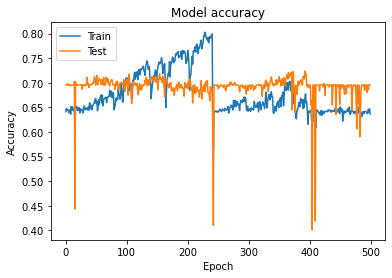

In [14]:
model_maker.plot_model(trained_model)

In [9]:
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model\assets
